Citation Request: This dataset is public available for research. The details are described in [Cortez et al., 2009]. Please include this citation if you plan to use this database:

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016 [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

Title: Wine Quality

Sources Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009

Past Usage:

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

In the above reference, two datasets were created, using red and white wine samples. The inputs include objective tests (e.g. PH values) and the output is based on sensory data (median of at least 3 evaluations made by wine experts). Each expert graded the wine quality between 0 (very bad) and 10 (very excellent). Several data mining methods were applied to model these datasets under a regression approach. The support vector machine model achieved the best results. Several metrics were computed: MAD, confusion matrix for a fixed error tolerance (T), etc. Also, we plot the relative importances of the input variables (as measured by a sensitivity analysis procedure).

Relevant Information:

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are munch more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Number of Instances: red wine - 1599; white wine - 4898.

Number of Attributes: 11 + output attribute

Note: several of the attributes may be correlated, thus it makes sense to apply some sort of feature selection.

Attribute information:

For more information, read [Cortez et al., 2009].

Input variables (based on physicochemical tests): 1 - fixed acidity 2 - volatile acidity 3 - citric acid 4 - residual sugar 5 - chlorides 6 - free sulfur dioxide 7 - total sulfur dioxide 8 - density 9 - pH 10 - sulphates 11 - alcohol Output variable (based on sensory data): 12 - quality (score between 0 and 10)

Missing Attribute Values: None

In [76]:
# import numpy and pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline


# load red and white wine datasets
red_df = pd.read_csv('winequality-red.csv', sep=';')
white_df = pd.read_csv('winequality-white.csv', sep=';')

In [5]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
# create color array for red dataframe
color_red = np.repeat('red', red_df.shape[0])

# create color array for white dataframe
color_white = np.repeat('white', white_df.shape[0])

In [8]:
red_df['color'] = color_red
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [9]:
white_df['color'] = color_white
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [10]:
# append dataframes
wine_df = red_df.append(white_df)

# view dataframe to check for success
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [11]:
wine_df.to_csv('winequality_edited.csv', index=False)

# Histogram for Various Features

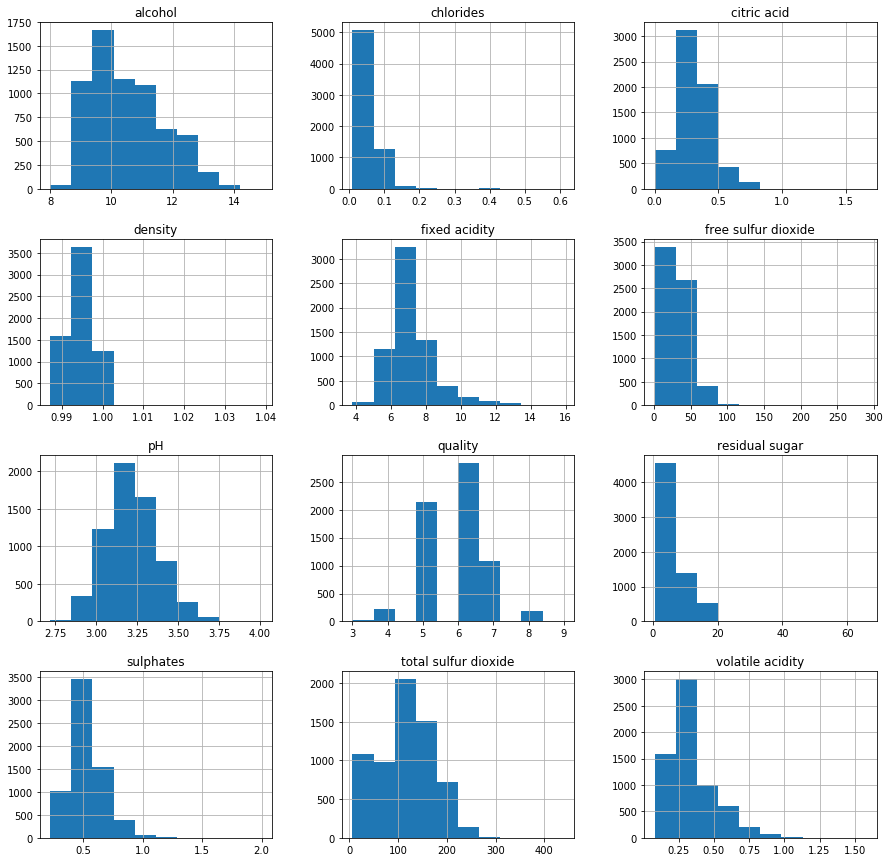

In [35]:
wine_df.hist(figsize = [15,15]);

# Scatter plot

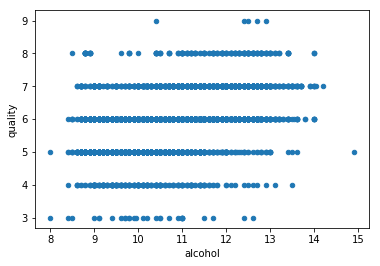

In [21]:
wine_df.plot(x='alcohol', y = 'quality', kind='scatter');

### alcohol have most positive scatter plot

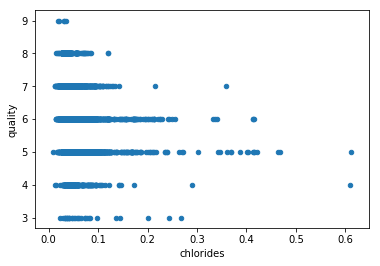

In [22]:
wine_df.plot(x='chlorides', y = 'quality', kind='scatter');

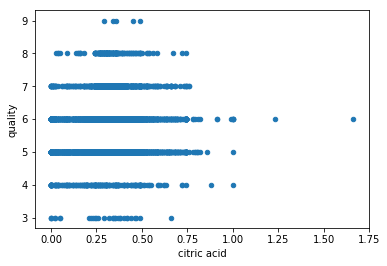

In [24]:
wine_df.plot(x='citric acid', y = 'quality', kind='scatter');

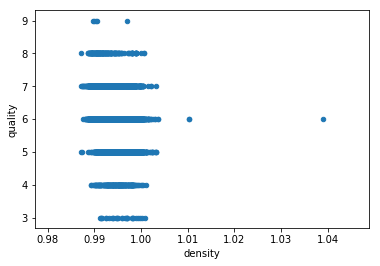

In [25]:
wine_df.plot(x='density', y = 'quality', kind='scatter');

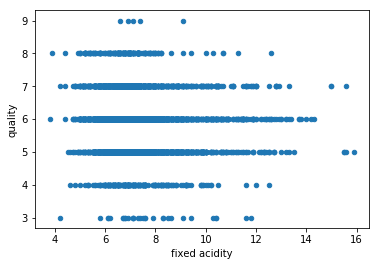

In [26]:
wine_df.plot(x='fixed acidity', y = 'quality', kind='scatter');

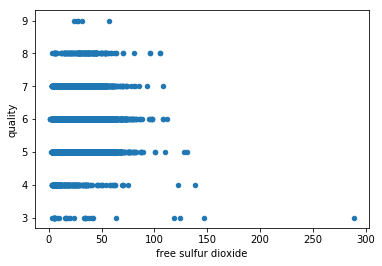

In [27]:
wine_df.plot(x='free sulfur dioxide', y = 'quality', kind='scatter');

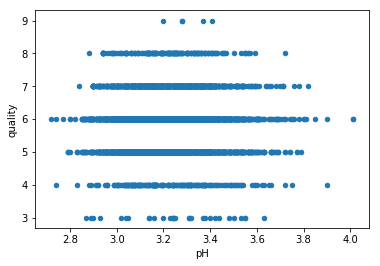

In [28]:
wine_df.plot(x='pH', y = 'quality', kind='scatter');

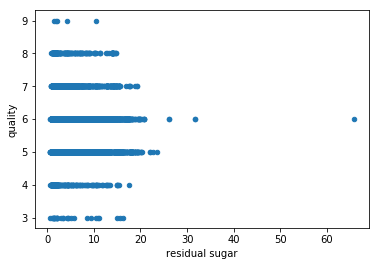

In [29]:
wine_df.plot(x='residual sugar', y = 'quality', kind='scatter');

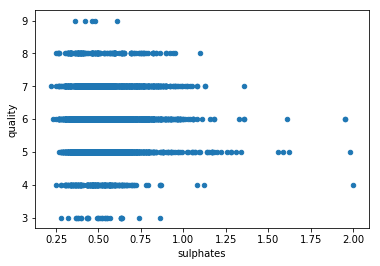

In [30]:
wine_df.plot(x='sulphates', y = 'quality', kind='scatter');

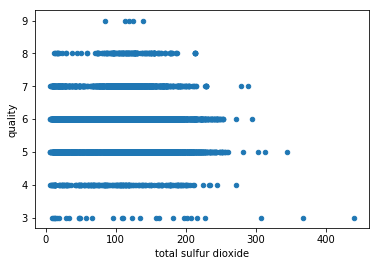

In [31]:
wine_df.plot(x='total sulfur dioxide', y = 'quality', kind='scatter');

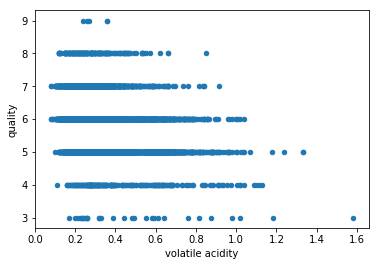

In [32]:
wine_df.plot(x='volati', y = 'quality', kind='scatter');

In [38]:
wine_df.groupby('color').mean().quality

color
red      5.636023
white    5.877909
Name: quality, dtype: float64

### white wine mean quality is higher 

In [40]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [41]:
wine_df.describe().pH

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

Acidity Levels:
High: Lowest 25% of pH values
Moderately High: 25% - 50% of pH values
Medium: 50% - 75% of pH values
Low: 75% - max pH value

In [42]:
bin_edges = [2.72, 3.11, 3.21, 3.32, 4.01]

In [46]:
bin_names = ['high', 'moderate high', 'medium', 'low']

In [45]:
wine_df['acidity levels'] = pd.cut(wine_df['pH'], bin_edges, labels = bin_names)

wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,moderate high
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,moderate high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [49]:
wine_df.groupby('acidity levels').mean().quality

acidity levels
high             5.783343
moderate high    5.784540
medium           5.850832
low              5.859593
Name: quality, dtype: float64

In [50]:
wine_df.to_csv('winequality_edited.csv', index = False)

In [51]:
quality_df = pd.read_csv('winequality_edited.csv')

In [53]:
quality_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,moderate high
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,moderate high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [64]:
quality_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [55]:
#alcohol content less than the medium
low_alcohol = quality_df[quality_df['alcohol'] < 10.30]
#alcohol centent higher than the medium
high_alcohol = quality_df[quality_df['alcohol'] >= 10.30]

#checking
num_samples = quality_df.shape[0]
num_samples == low_alcohol['quality'].count() + high_alcohol['quality'].count()

True

In [56]:
low_alcohol.mean().quality, high_alcohol.mean().quality

(5.475920679886686, 6.146084337349397)

In [70]:
median = quality_df['alcohol'].median()
low = quality_df.query('alcohol < {}'.format(median))
high = quality_df.query('alcohol >= {}'.format(median))

mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean()

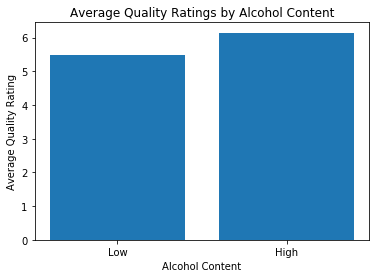

In [71]:
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

### Do wines with higher alcoholic content receive better ratings?
higher alcoholic contete generally receive better quality rating

In [67]:
low_sugar = quality_df[quality_df['residual sugar'] < 3.00]
high_sugar = quality_df[quality_df['residual sugar'] >= 3.00]

num_samples == low_sugar['quality'].count() + high_sugar['quality'].count()

True

In [68]:
low_sugar.mean().quality, high_sugar.mean().quality

(5.808800743724822, 5.82782874617737)

In [74]:
# Use query to select each group and get its mean quality

low = quality_df[quality_df['residual sugar'] < 3.00]
high = quality_df[quality_df['residual sugar'] >= 3.00]

mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean()

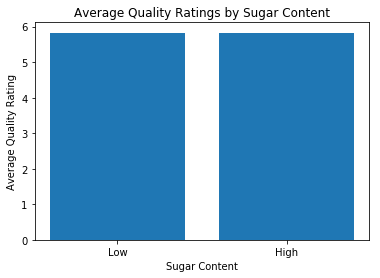

In [75]:
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Sugar Content')
plt.xlabel('Sugar Content')
plt.ylabel('Average Quality Rating');

### Do sweeter wines receive better ratings?
yes but very small difference

### plotting wine type and quality
1. Red bar proportions = counts for each quality rating / total # of red samples
2. White bar proportions = counts for each quality rating / total # of white samples

In [77]:
#each rating color count
color_counts = quality_df.groupby(['color', 'quality']).count()['pH']
color_counts

color  quality
red    3            10
       4            53
       5           681
       6           638
       7           199
       8            18
white  3            20
       4           163
       5          1457
       6          2198
       7           880
       8           175
       9             5
Name: pH, dtype: int64

In [79]:
#each color total count
color_totals = wine_df.groupby('color').count()['pH']
color_totals

color
red      1599
white    4898
Name: pH, dtype: int64

In [81]:
# proportions by dividing red rating counts by total number of red samples
red_proportions = color_counts['red']/ color_totals['red']
red_proportions

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
Name: pH, dtype: float64

In [83]:
# proportions by dividing white rating counts by total number of white samples
white_proportions = color_counts['white']/ color_totals['white']
white_proportions

quality
3    0.004083
4    0.033279
5    0.297468
6    0.448755
7    0.179665
8    0.035729
9    0.001021
Name: pH, dtype: float64

In [88]:
red_proportions['9'] = 0
red_proportions

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
9    0.000000
Name: pH, dtype: float64

In [89]:
ind = np.arange(len(red_proportions))
width = 0.5

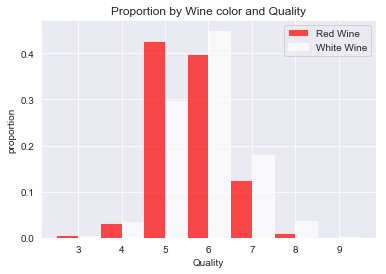

In [93]:
red_bars = plt.bar(ind, red_proportions, width, color ='r', alpha = .7, label = 'Red Wine')
white_bars = plt.bar(ind + width, white_proportions, width, color = 'w', alpha=.7, label ='White Wine')

plt.ylabel('proportion')
plt.xlabel('Quality')
plt.title('Proportion by Wine color and Quality')
locations = ind + width / 2
labels = ['3','4','5','6','7','8','9']
plt.xticks(locations, labels)

plt.legend();